# CS-UY 3943 - Introduction of Data Science
## Week 11: Time Series Analysis

Please edit the cell below to add your name, NetID, assigned group, and group members for this assignment. **Complete this section before proceeding to the assignment questions.**

Name:  Lenny Remache
NetID:  ljr381
Group (Letter): E 
Group Member 1: oir209
Group Member 2: Sabrina swl416
***

### Working with Time Series 
Here we will analyze a timeseries of number of Yellow Fever cases from an unidentified country by year. The data is from 1700 – 2008. The file **cases.csv** is available in your git repository.

1\. Load the `cases.csv` data set, parse the `YEAR` column as a datetime value, and set `YEAR` as the index of the resulting `DataFrame`. Finally, plot the resulting `DataFrame`. After reading the data into a `pandas` `DataFrame`, execute a line similar to the one below:

```df.index.freq = df.index.inferred_freq```

This assumes that the `DataFrame` that you created is named `df`. This line is necessary to avoid the generation of a large number of warnings when peforming the grid parameter search in question #4.

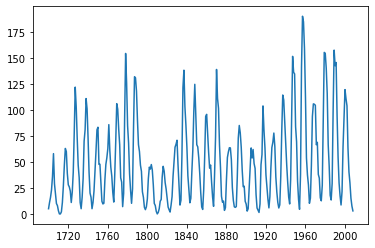

,YFCASES
YEAR,
1700-01-01,5.0
1701-01-01,11.0
1702-01-01,16.0
1703-01-01,23.0
1704-01-01,36.0


In [53]:
#Place your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('cases.csv', parse_dates=['YEAR'])
df.set_index('YEAR',inplace=True)
df.index.freq = df.index.inferred_freq

_ = plt.plot(df)
plt.show()

df.head()

2\. Autoregressive Moving Average (ARMA) models require that the data being modeled is stationary. Is the yellow fever cases data stationary? Provide evidence for your claim. If the dataset is not stationary, transform the dataset to make it stationary and plot the transformed data set.

Null-Hypothesis: It is not stationary
Non-Stationary p-value:  0.05307642172812057
Fail to reject null hypothesis.


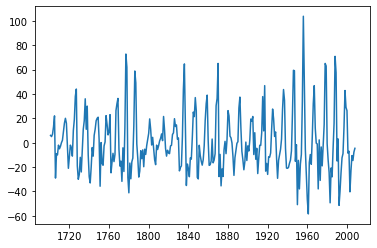

Stationary p-value:  1.715552423167133e-27


In [54]:
#Place your code here
from statsmodels.tsa.stattools import adfuller

print('Null-Hypothesis: It is not stationary')
results = adfuller(df)
print("Non-Stationary p-value: " , results[1])
print('Fail to reject null hypothesis.')

# taking the difference to make it stationary
df_stationary = df.diff().dropna()

_ = plt.plot(df_stationary)
plt.show()

results_stationary = adfuller(df_stationary)
print("Stationary p-value: " , results_stationary[1])

<p>
<span style="color:blue">
Place your response here
</span>
</p>

3\. Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) of the cases timeseries with 20 lags displayed.

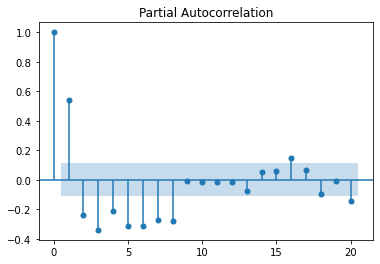

In [55]:
# Place your code here
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

_ = plot_pacf(df_stationary, lags= 20)
plt.show()


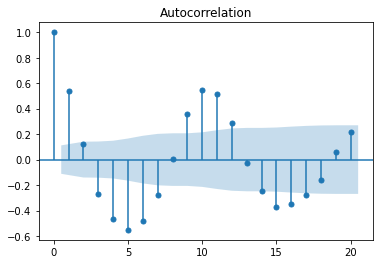

In [56]:
_ = plot_acf(df_stationary, lags=20)
plt.show()

4\. Describe what the plots indicate (in terms of autoregressive order (_p_) and moving average order (_q_)). 

Recall the following:

| Plot type | AR(p) => ARIMA(p,0,0) | MA(q) => ARIMA(0,0,q) | ARMA(p,q) => ARIMA(p,0,q) |
| :--- | :--- | :--- | :--- |
| ACF | Tails off | Cuts off after lag q | Tails off |
| PACF | Cuts off after lag p| Tails off | Tails off | 

<p>
<span style="color:blue">
ARIMA(8,0,0), ACF is tail off, PACF cuts off after lag 8</span>
</p>

5\. Use the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) to determine the best ARMA parameters for the model. Be sure to use any transformations applied previously when performing model selection.


1. Perform a grid search on ARMA parameters _p_ (from 0 - 10) and _q_ (from 0 - 10) 
1. Instantiate an ARMA(p,q) model for each pair of parameters. Use the `SARIMAX` constructor with the `order` parameter specified as `(p,0,q)` for each model and the `trend` parameter set to `'c'`.
1. Fit the model to the yellow fever cases data. Use the parameter `method='powell'` when calling the model's `.fit()` method. This optimization routine performs well with this dataset.
1. Store the AIC and BIC values for each model (**HINT**: using a `DataFrame` will make display of sorted values simpler)
1. Print the sorted results in increasing order based on the models' **AIC** values (in a different notebook cell than the parameter search)
1. Also, print the sorted results in increasing order based on the models' **BIC** values (in a different notebook cell than the parameter search)

**NOTE**: Some parameter choices will produce warnings. You can ignore these warnings for the purposes of this exercise. 

Recall the following:

| Criterion | Description | Evaluation | Strengths |
| :--- | :--- | :--- | :--- |
| AIC | measures model quality | lower score, better model | chooses better predictive models |
| BIC | measures model quality | lower score, better model | chooses better explanatory models | 

Do the computed AIC and BIC values for the models confirm or cause you to revise your interpretation of the ACF and PACF plots?

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Place your code here
order_aic_bic = []
for p in range(11):
    for q in range(11):
        model = SARIMAX(df_stationary, order=(p,0,q), trend='c')
        results = model.fit(method='powell')
        order_aic_bic.append((p, q, results.aic, results.bic))

order_df = pd.DataFrame(order_aic_bic, columns=['p','q', 'aic', 'bic'])

Optimization terminated successfully.
         Current function value: 4.595967
         Iterations: 1
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 4.443634
         Iterations: 2
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 4.388250
         Iterations: 2
         Function evaluations: 86
Optimization terminated successfully.
         Current function value: 4.392569
         Iterations: 6
         Function evaluations: 345
Optimization terminated successfully.
         Current function value: 4.314757
         Iterations: 6
         Function evaluations: 413


/Users/lennyremache/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.271938
         Iterations: 8
         Function evaluations: 634
Optimization terminated successfully.
         Current function value: 4.260434
         Iterations: 8
         Function evaluations: 713
Optimization terminated successfully.
         Current function value: 4.259285
         Iterations: 8
         Function evaluations: 802
Optimization terminated successfully.
         Current function value: 4.256392
         Iterations: 3
         Function evaluations: 329
Optimization terminated successfully.
         Current function value: 4.235620
         Iterations: 6
         Function evaluations: 736
Optimization terminated successfully.
         Current function value: 4.230890
         Iterations: 10
         Function evaluations: 1345
Optimization terminated successfully.
         Current function value: 4.423198
         Iterations: 1
         Function evaluations: 34
Optimization terminated successfu

/Users/lennyremache/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Optimization terminated successfully.
         Current function value: 4.224116
         Iterations: 14
         Function evaluations: 819
Optimization terminated successfully.
         Current function value: 4.167519
         Iterations: 7
         Function evaluations: 471
Optimization terminated successfully.
         Current function value: 4.211754
         Iterations: 13
         Function evaluations: 1058
Optimization terminated successfully.
         Current function value: 4.157056
         Iterations: 4
         Function evaluations: 371
Optimization terminated successfully.
         Current function value: 4.143215
         Iterations: 4
         Function evaluations: 410
Optimization terminated successfully.
         Current function value: 4.143052
         Iterations: 5
         Function evaluations: 554
Optimization terminated successfully.
         Current function value: 4.143020
         Iterations: 4
         Function evaluations: 485
Optimization terminated success

Optimization terminated successfully.
         Current function value: 4.113116
         Iterations: 9
         Function evaluations: 1637
Optimization terminated successfully.
         Current function value: 4.108840
         Iterations: 8
         Function evaluations: 1500
Optimization terminated successfully.
         Current function value: 4.106024
         Iterations: 8
         Function evaluations: 1589
Optimization terminated successfully.
         Current function value: 4.103648
         Iterations: 8
         Function evaluations: 1686
Optimization terminated successfully.
         Current function value: 4.106922
         Iterations: 7
         Function evaluations: 1531
Optimization terminated successfully.
         Current function value: 4.134330
         Iterations: 1
         Function evaluations: 120
Optimization terminated successfully.
         Current function value: 4.135675
         Iterations: 2
         Function evaluations: 253
Optimization terminated succe

In [58]:
print(order_df.sort_values('aic'))

    p  q          aic          bic
74  6  8  2560.417936  2620.099533
75  6  9  2562.092140  2625.503836
84  7  7  2563.045504  2622.727101
95  8  7  2563.289460  2626.701156
85  7  8  2563.310633  2626.722329
.. .. ..          ...          ...
3   0  3  2715.822744  2734.473242
12  1  1  2724.593570  2739.513969
11  1  0  2730.689777  2741.880077
1   0  1  2743.278277  2754.468576
0   0  0  2835.115773  2842.575973

[121 rows x 4 columns]


In [59]:
print(order_df.sort_values('bic'))

    p  q          aic          bic
24  2  2  2579.191644  2601.572243
27  2  5  2570.220177  2603.791075
88  8  0  2566.747585  2604.048582
26  2  4  2576.746524  2606.587322
67  6  1  2574.467528  2608.038426
.. .. ..          ...          ...
3   0  3  2715.822744  2734.473242
12  1  1  2724.593570  2739.513969
11  1  0  2730.689777  2741.880077
1   0  1  2743.278277  2754.468576
0   0  0  2835.115773  2842.575973

[121 rows x 4 columns]


<p>
<span style="color:blue">
The AIC (p,q) are (6,8) and the bic (p,q) are (2,2). They do cause us to revise our interpretations of the ACf and PACF plots since p and q values change????</span>
</p>

6\. Build each of the 2 models selected based on the best AIC and BIC values from the parameter search. Fit each model to the data, calculate each models mean absolute error (MAE), and plot the diagnostics of the model to determine how well it fits the observed data. What are the key takeaways from the diagnostics plot in relation to the fit of the models? Which model would you chose to perform your forecast of yellow fever cases?

Optimization terminated successfully.
         Current function value: 4.104575
         Iterations: 10
         Function evaluations: 1860
MAE:  10.92287422545831


/Users/lennyremache/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


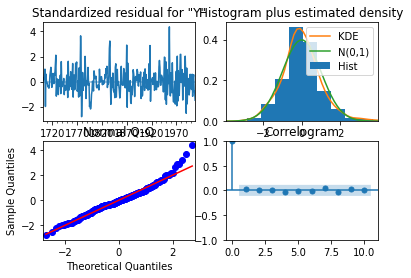

                               SARIMAX Results                                
Dep. Variable:                YFCASES   No. Observations:                  308
Model:               SARIMAX(6, 0, 8)   Log Likelihood               -1264.209
Date:                Tue, 05 Apr 2022   AIC                           2560.418
Time:                        15:54:21   BIC                           2620.100
Sample:                    01-01-1701   HQIC                          2584.281
                         - 01-01-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0874      0.486      0.180      0.857      -0.865       1.040
ar.L1          1.0625      0.105     10.073      0.000       0.856       1.269
ar.L2         -0.5687      0.190     -2.990      0.0

In [62]:
# Place your code here
model = SARIMAX(df_stationary, order=(6,0,8), trend='c')
results = model.fit(method='powell')

mae = np.mean(np.abs(results.resid))
print("MAE: ", mae)

results.plot_diagnostics()
plt.show()

print(results.summary())

/Users/lennyremache/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.167519
         Iterations: 7
         Function evaluations: 471
MAE:  11.68661793440439


/Users/lennyremache/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


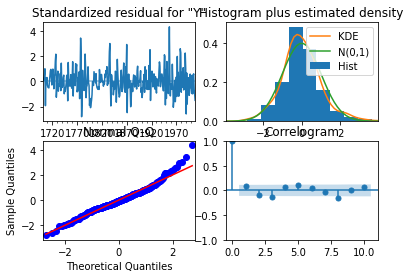

                               SARIMAX Results                                
Dep. Variable:                YFCASES   No. Observations:                  308
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1283.596
Date:                Tue, 05 Apr 2022   AIC                           2579.192
Time:                        15:54:25   BIC                           2601.572
Sample:                    01-01-1701   HQIC                          2588.140
                         - 01-01-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0287      0.137      0.210      0.834      -0.240       0.297
ar.L1          1.6277      0.024     68.409      0.000       1.581       1.674
ar.L2         -0.9585      0.021    -44.606      0.0

In [63]:
model = SARIMAX(df_stationary, order=(2,0,2), trend='c')
results = model.fit(method='powell')

mae = np.mean(np.abs(results.resid))
print("MAE: ", mae)

results.plot_diagnostics()
plt.show()

print(results.summary())

<p>
<span style="color:blue">
Model 1 fits better as the correlogram 
</span>
</p>